# <center>Winter 2022 Data Science Intern Challenge - Mahdi Mousaei</center>

First let's import the necessary packages

In [2]:
import pandas as pd
import numpy as np
import missingno as msno
from sklearn.cluster import DBSCAN
from sklearn.ensemble import IsolationForest
import plotly.express as px

Please complete the following questions, and provide your thought process/work. You can attach your work in a text file, link, etc. on the application page. Please ensure answers are easily visible for reviewers!

## Question 1: 
On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

1. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 
2. What metric would you report for this dataset?
3. What is its value?



In [3]:
data = pd.read_csv('DSC_data.csv')
data.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


<AxesSubplot:>

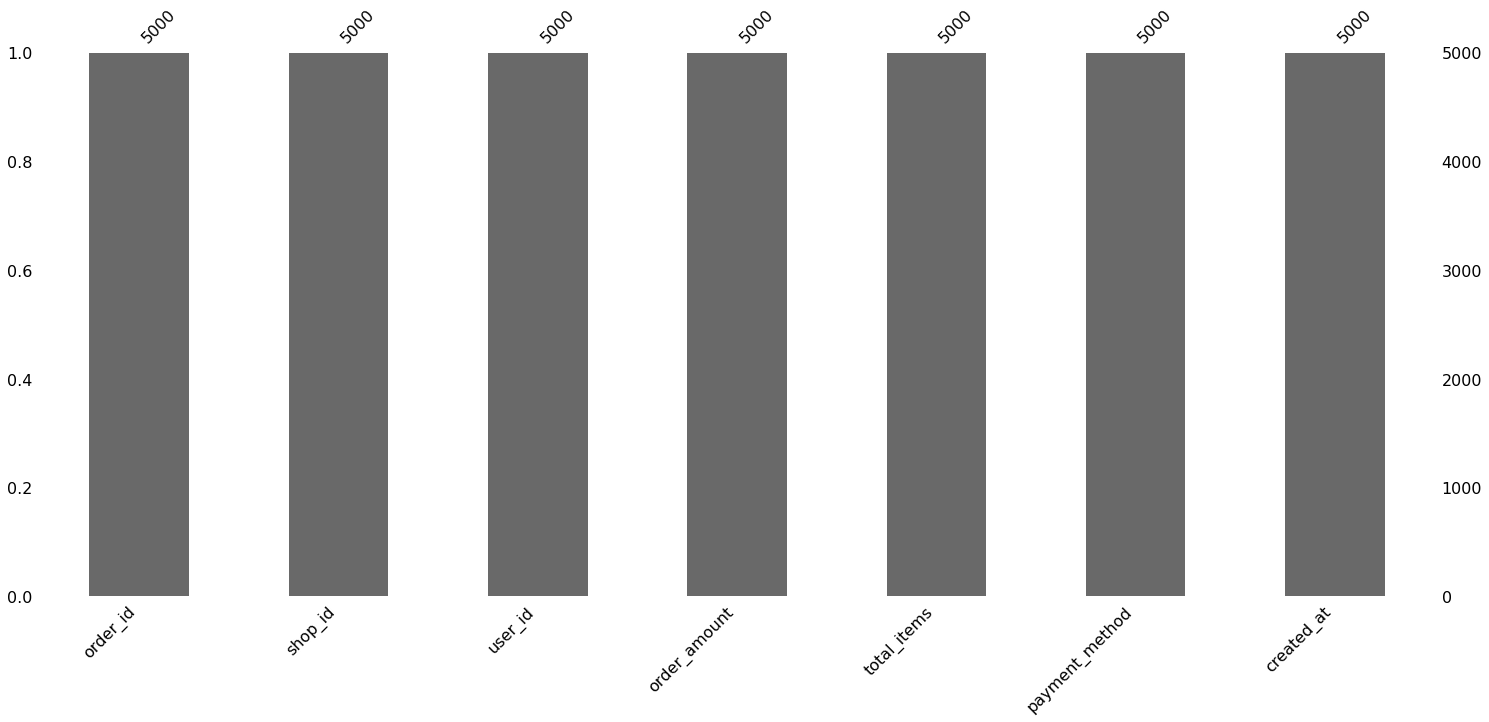

In [4]:
msno.bar(data)

Accordingly, no missing value is found in the data set. Now, let's have a look at the data statistics!

In [5]:
data['order_amount'].describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

Accordingly we see that mean of order_amount column is 3145.12 while the standard deviation for this column is 41282.53. Looking at maximum of order_value (704000), a potential outlier is detected.

### Isolation Forest for outlier detection:

Just to check if there is an outlier in data I used Isolation Forest algorithm

In [6]:
data_order_amount = data['order_amount'].to_numpy()
clf = IsolationForest(max_samples='auto', random_state = None, contamination= 'auto')
preds = clf.fit_predict(data_order_amount.reshape(-1, 1))

In [7]:
unique, counts = np.unique(preds, return_counts=True)
print ('About '+str(((counts[0]/counts[1])*100))+' percentage of data is considered as outlier')

About 7.828337287039034 percentage of data is considered as outlier


The existance of outliers caused an unusal AOV for the sneakers! See below for a visualization:

In [20]:
fig = px.scatter(x=data['order_id'], y=data['order_amount'])
fig.update_layout(
    title="order amount vs order id",
    xaxis_title="order_id",
    yaxis_title="order_amount",
)

In [9]:
data['Outlier_ID'] = preds
data_outlier = data[data['Outlier_ID']==-1]

In [10]:
data_outlier.groupby(['shop_id']).sum().sort_values('order_amount')

,order_id,user_id,order_amount,total_items,Outlier_ID
shop_id,,,,,
77,1943,728,624,4,-1
1,375,948,632,4,-1
40,2726,783,644,4,-1
36,4750,884,650,5,-1
69,3383,970,655,5,-1
...,...,...,...,...,...
91,14125,6052,5280,33,-7
18,14124,6523,5460,35,-8
12,28796,7534,5829,29,-9


In [18]:
data_42=data[data['shop_id']==42]
fig = px.scatter(x=data_42['order_id'], y=data_42['order_amount'])
fig.update_layout(
    title="order amount vs order id for store 42",
    xaxis_title="order_id",
    yaxis_title="order_amount",
)

In [12]:
data_42['total_items'].value_counts()

2000    17
1       15
2       13
3        3
4        2
5        1
Name: total_items, dtype: int64

As you can see the bulk sale of 2000 items in store 42 acting as outliers! 

### 2. What metric would you report for this dataset?

I would report the data in quartiles: Q1, Q2, Q3. Also the percentile at P99 is considered to have a better overview on the outliers.

### 3. What is its value?

In [13]:
data['order_amount'].describe(percentiles=[0.25, 0.5, 0.75, 0.99])

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
99%       25725.000000
max      704000.000000
Name: order_amount, dtype: float64

## Question 2

For this question you’ll need to use SQL. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.

1. How many orders were shipped by Speedy Express in total?

output > 54

2. What is the last name of the employee with the most orders?

Output > Peacock

3. What product was ordered the most by customers in Germany?

result > Boston Crab Meat